# COMP3314 Assignment1-Q3: Digits Classification (15 Points)

In chapter 3 sample codes, we applied different scikit-learn classifiers for the Iris data set. In this question, we will use the classifiers over another data set: hand-written digits.

Your tasks:

1. Split the dataset into a training set and a test set.
2. Create classifiers from scikit-learn and set their hyper-parameters. The classifiers include:
   * Perceptron
   * Logistic regression
3. Implement Adaline by your self.
3. Train your classifiers with the training set.
4. Evaluate your classifiers with the test set.
5. Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?


In [60]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib as mpl

digits = load_digits()

xs = digits.data
ys = digits.target

print(xs.shape)
print(ys.shape)

(1797, 64)
(1797,)


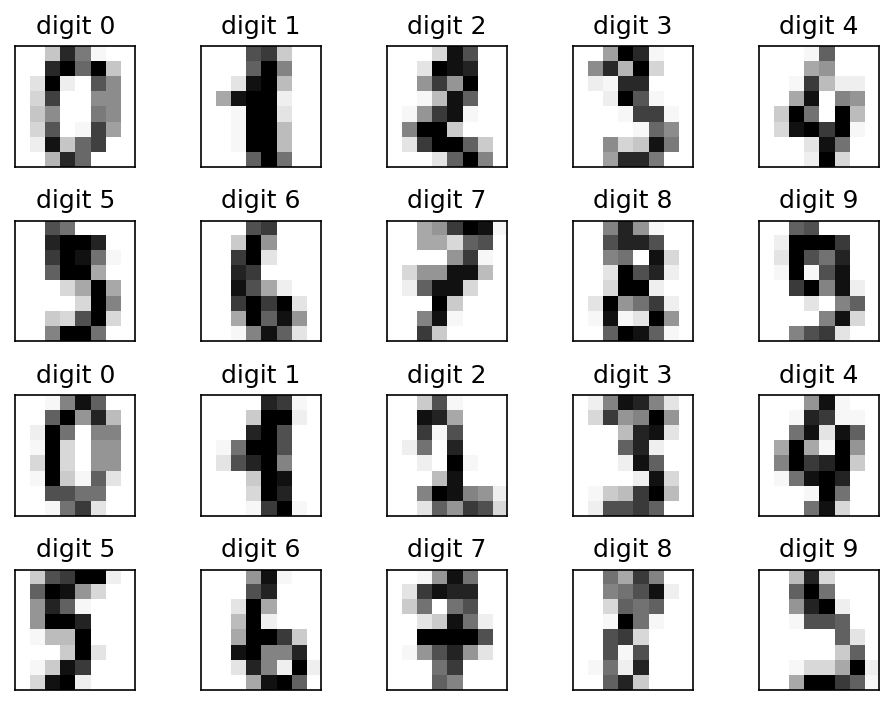

In [61]:
mpl.rcParams["figure.dpi"] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()

for index in range(num_rows * num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap="Greys", interpolation="nearest")
    ax[index].set_title("digit " + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Data Preprocessing (3 points)

Hints:
1. Divide training and test data set and apply other techniques we have learned if needed.
2. You may add some common functions here, such as the evaluation code.

In [62]:
from sklearn.model_selection import train_test_split
import numpy as np


def get_accuracy(ys, ys_pred) -> float:
    # Your code, implement the code for evaluation
    correct: float = 0
    for i, y in enumerate(ys):
        if y == ys_pred[i]:
            correct += 1.0
    total: float = ys.size
    return correct/total


# Your code, split the train/test dataset
x_train, x_test, y_train, y_test = train_test_split(xs, ys, train_size=0.5, random_state=42)

## Classifier #1 Perceptron (3 points)

In [63]:
# Example code, including training and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline

# Tune the eta0 hyperparameter.
eta0_list = [0.0001, 0.001, 0.01, 0.1, 1]

# Your code here.
pipe = make_pipeline(Perceptron(random_state=42, eta0=1))
ys_pred = pipe.fit(x_train, y_train).predict(x_test)
print(get_accuracy(y_test, ys_pred))

0.9543937708565072


## Classifier #2 Logistic Regression (3 points)

In [64]:
# Your code, including training and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

# Tune the C hyperparameter.
C_list = [1e-3, 0.001, 0.01, 1, 10, 100]
pipe = make_pipeline(LogisticRegression(C=0.01))
ys_pred = pipe.fit(x_train, y_train).predict(x_test)
print(get_accuracy(y_test, ys_pred))

0.9610678531701891


/Users/kdwk/miniconda3/envs/COMP3314/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Classifier #3 Choose it by yourself (3 points)

You are required to choose another classifier in sklearn and evaluate it yourself.  Try to find a better one than the previous two.

In [67]:
# Your code, including training and testing, to observe the accuracies.
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.preprocessing import StandardScaler

ys_pred = make_pipeline(StandardScaler(), GaussianProcessClassifier()).fit(x_train, y_train).predict(x_test)
print(get_accuracy(y_test, ys_pred))

0.967741935483871


## Discussions (3 points)

Compare the performance of the classifiers. Which classifier(s) perform(s) the best and worst, and why?

With regard to accuracy, the Gaussian Process Classifier performs the best, while the Perceptron performs the worst. This is because the Perceptron uses a very simple and clear-cut threshold function without considering how 'far away' the input is from a class. This results in an oversimplication of classification.